In [1]:
import pandas as pd
import numpy as np
import warnings

### Data Loading

In [2]:
data = pd.read_csv("/Users/divyakhairnar/Documents/MS_ITA/Spring23/IRTM/Project/bookGenreData-original.csv")

In [3]:
data.head()

,index,title,genre,summary
0,0,Drowned Wednesday,fantasy,Drowned Wednesday is the first Trustee among ...
1,1,The Lost Hero,fantasy,"As the book opens, Jason awakens on a school ..."
2,2,The Eyes of the Overworld,fantasy,Cugel is easily persuaded by the merchant Fia...
3,3,Magic's Promise,fantasy,The book opens with Herald-Mage Vanyel return...
4,4,Taran Wanderer,fantasy,Taran and Gurgi have returned to Caer Dallben...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4657 entries, 0 to 4656
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   index    4657 non-null   int64 
 1   title    4657 non-null   object
 2   genre    4657 non-null   object
 3   summary  4657 non-null   object
dtypes: int64(1), object(3)
memory usage: 145.7+ KB


In [5]:
#Display the books dataframe
print("Snapshot of books dataframe")
data

Snapshot of books dataframe


,index,title,genre,summary
0,0,Drowned Wednesday,fantasy,Drowned Wednesday is the first Trustee among ...
1,1,The Lost Hero,fantasy,"As the book opens, Jason awakens on a school ..."
2,2,The Eyes of the Overworld,fantasy,Cugel is easily persuaded by the merchant Fia...
3,3,Magic's Promise,fantasy,The book opens with Herald-Mage Vanyel return...
4,4,Taran Wanderer,fantasy,Taran and Gurgi have returned to Caer Dallben...
...,...,...,...,...
4652,4652,Hounded,fantasy,"Atticus O’Sullivan, last of the Druids, lives ..."
4653,4653,Charlie and the Chocolate Factory,fantasy,Charlie Bucket's wonderful adventure begins wh...
4654,4654,Red Rising,fantasy,"""I live for the dream that my children will be..."
4655,4655,Frostbite,fantasy,"Rose loves Dimitri, Dimitri might love Tasha, ..."


In [6]:
data.groupby('genre').count()


,index,title,summary
genre,,,
crime,500,500,500
fantasy,876,876,876
history,600,600,600
horror,600,600,600
psychology,100,100,100
romance,111,111,111
science,647,647,647
sports,100,100,100
thriller,1023,1023,1023


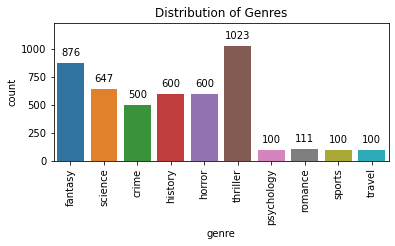

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create countplot
ax = sns.countplot(x='genre', data=data)
plt.title('Distribution of Genres')
# Add count values to bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.4)
max_count = data['genre'].value_counts().max()
plt.ylim([0, max_count*1.2])

plt.show()

### Balancing class

In [8]:
import random

# count the number of rows in each genre
genre_counts = data['genre'].value_counts()

# drop genres with less than 500 rows
to_drop = []
for genre, count in genre_counts.items():
    if count < 500:
        to_drop.append(genre)
data = data[~data['genre'].isin(to_drop)]

# randomly select 500 rows from each genre
selected_rows = []
for genre in genre_counts.index:
    genre_rows = data[data['genre'] == genre]
    if len(genre_rows) >= 500:
        selected_genre_rows = genre_rows.sample(n=500, random_state=42)
        selected_rows.append(selected_genre_rows)
data = pd.concat(selected_rows)

# shuffle the DataFrame
data = data.sample(frac=1, random_state=42)

# overwrite the original csv file with the modified DataFrame
data.to_csv('/Users/divyakhairnar/Documents/MS_ITA/Spring23/IRTM/Project/bookGenreData.csv', index=False)


In [9]:
data.groupby('genre').count()

,index,title,summary
genre,,,
crime,500,500,500
fantasy,500,500,500
history,500,500,500
horror,500,500,500
science,500,500,500
thriller,500,500,500


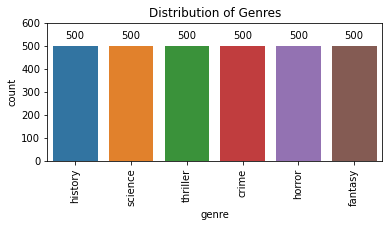

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create countplot
ax = sns.countplot(x='genre', data=data)
plt.title('Distribution of Genres')
# Add count values to bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.4)
max_count = data['genre'].value_counts().max()
plt.ylim([0, max_count*1.2])

plt.show()

In [11]:
#displaying the summary before preprocessing
data['summary']

3003    Author Erik Larson imbues the incredible event...
810      In the mid-21st century, the international co...
1574                                           ==Receptio
2871     The novel's protagonist is Joe Oakes - "Oakes...
1394     At an exhibition of snuff boxes, Hercule Poir...
                              ...                        
1796     The story follows the adventures of a fiction...
556      Dune: The Machine Crusade moves forward into ...
832      As Ben Skywalker seeks to find proof that Jac...
669      Mirrorsun, which orbits earth and prevents el...
94       A coming of age story set in the mythical "go...
Name: summary, Length: 3000, dtype: object

### Data Cleaning

In [12]:
import re

def clean(text):
    # remove backslash-apostrophe 
    text = re.sub("\'", "", text) 
    # remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    
    return text

data.loc[:,'summary']=data.loc[:,'summary'].apply(lambda x: clean(x))

In [13]:
#Displaying column summary after cleaning.

print("Summary after text cleaning")
data['summary']
     

Summary after text cleaning


3003    author erik larson imbues the incredible event...
810     in the mid st century the international commit...
1574                                             receptio
2871    the novels protagonist is joe oakes oakesy a j...
1394    at an exhibition of snuff boxes hercule poirot...
                              ...                        
1796    the story follows the adventures of a fictiona...
556     dune the machine crusade moves forward into th...
832     as ben skywalker seeks to find proof that jace...
669     mirrorsun which orbits earth and prevents elec...
94      a coming of age story set in the mythical gold...
Name: summary, Length: 3000, dtype: object

## stopwords

In [14]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

# function to remove stopwords
def removestopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

data['summary'] = data['summary'].apply(lambda x: removestopwords(x))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/divyakhairnar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:

#Displaying "summary" after removing stop words

print("Snapshot of books['summary']\n\n")

data['summary']

Snapshot of books['summary']




3003    author erik larson imbues incredible events su...
810     mid st century international committee decided...
1574                                             receptio
2871    novels protagonist joe oakes oakesy journalist...
1394    exhibition snuff boxes hercule poirot meets mr...
                              ...                        
1796    story follows adventures fictional cyrus spita...
556     dune machine crusade moves forward center butl...
832     ben skywalker seeks find proof jacen solo kill...
669     mirrorsun orbits earth prevents electrical mac...
94      coming age story set mythical golden age spain...
Name: summary, Length: 3000, dtype: object

## Lemmatization

In [16]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/divyakhairnar/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [17]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemma=WordNetLemmatizer()

def lematizing(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = lemma.lemmatize(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence


data['summary'] = data['summary'].apply(lambda x: lematizing(x))
     

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/divyakhairnar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [18]:
data['summary']

3003    author erik larson imbues incredible event sur...
810     mid st century international committee decided...
1574                                             receptio
2871    novel protagonist joe oakes oakesy journalist ...
1394    exhibition snuff box hercule poirot meet mr sh...
                              ...                        
1796    story follows adventure fictional cyrus spitam...
556     dune machine crusade move forward center butle...
832     ben skywalker seek find proof jacen solo kille...
669     mirrorsun orbit earth prevents electrical mach...
94      coming age story set mythical golden age spain...
Name: summary, Length: 3000, dtype: object

## Stemming

In [19]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence


data['summary'] = data['summary'].apply(lambda x: stemming(x))

In [20]:
data['summary']

3003    author erik larson imbu incred event surround ...
810     mid st centuri intern committe decid forc redu...
1574                                             receptio
2871    novel protagonist joe oak oakesi journalist ma...
1394    exhibit snuff box hercul poirot meet mr shaita...
                              ...                        
1796    stori follow adventur fiction cyru spitama ach...
556     dune machin crusad move forward center butleri...
832     ben skywalk seek find proof jacen solo kill be...
669     mirrorsun orbit earth prevent electr machin fu...
94      come age stori set mythic golden age spain tit...
Name: summary, Length: 3000, dtype: object

### Data Analysis

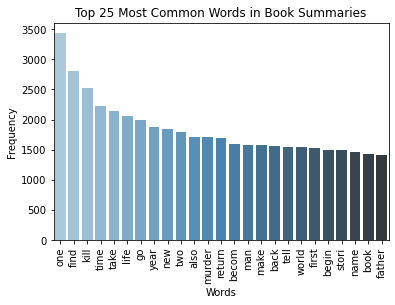

In [21]:
# Create a dictionary to count the frequency of each word
word_counts = {}
for summary in data['summary']:
    words = summary.lower().split()
    for word in words:
        if word not in word_counts:
            word_counts[word] = 1
        else:
            word_counts[word] += 1

# Create a dataframe with the top 25 most common words
data_word_counts = pd.DataFrame.from_dict(word_counts, orient='index', columns=['count'])
data_word_counts = data_word_counts.sort_values(by='count', ascending=False).head(25)

# Create a bar chart of the top 25 most common words
sns.barplot(x=data_word_counts.index, y='count', data=data_word_counts, palette='Blues_d')
plt.xticks(rotation=90)
plt.title('Top 25 Most Common Words in Book Summaries')

plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

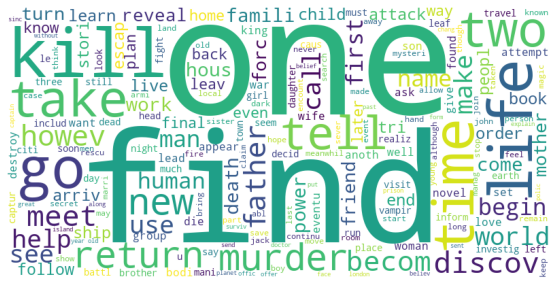

In [22]:
from wordcloud import WordCloud

# Word cloud for summary
text = ' '.join(data['summary'].astype(str).tolist())
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

/Users/divyakhairnar/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


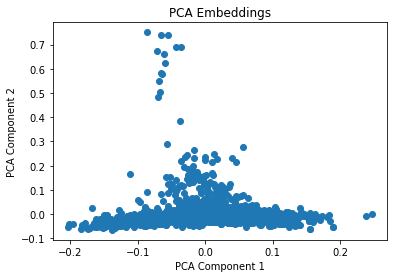

In [23]:
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt


# Extract the 'summary' column from the DataFrame
summary = data['summary']

# Create a TF-IDF vectorizer object
vectorizer = TfidfVectorizer(stop_words='english')

# Generate the TF-IDF matrix
X = vectorizer.fit_transform(summary)

# Convert the sparse matrix to a dense matrix
X_dense = X.todense()

# Create a PCA object with 2 components
pca = PCA(n_components=2)

# Fit the PCA object to the dense matrix and obtain the embeddings
embeddings = pca.fit_transform(X_dense)

# Plot the embeddings
plt.scatter(embeddings[:, 0], embeddings[:, 1])
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Embeddings')
plt.show()

/Users/divyakhairnar/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


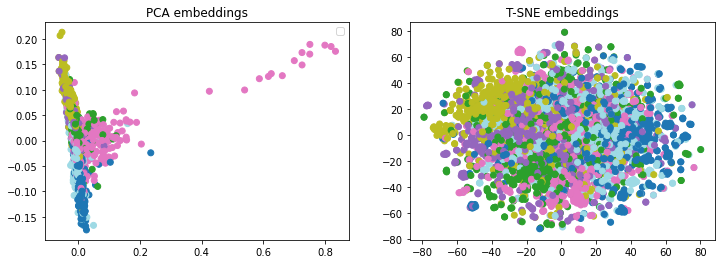

In [24]:
import gensim
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from gensim.models import TfidfModel
from gensim.matutils import corpus2dense


# Get the TF-IDF feature input to obtain PCA/T-SNE embeddings
doc_tokens = data['summary'].apply(lambda x: x.split())
vocab = gensim.corpora.Dictionary(doc_tokens)
doc_bows = [vocab.doc2bow(doc) for doc in doc_tokens]
tfidf = TfidfModel(doc_bows)
X = corpus2dense(tfidf[doc_bows], num_terms=len(vocab), num_docs=len(doc_bows)).transpose()
Y = data['genre']

# Convert categorical labels to numerical values
le = LabelEncoder()
Y = le.fit_transform(Y)

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Perform T-SNE
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200)
X_tsne = tsne.fit_transform(X)

# Plot PCA embeddings
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
scatter = ax[0].scatter(X_pca[:, 0], X_pca[:, 1], c=Y, cmap='tab20')
ax[0].set_title('PCA embeddings')
# Get handles and labels for the legend
handles, labels = scatter.legend_elements()

# Print out the incorrect labels
incorrect_labels = np.setdiff1d(labels, le.classes_)
#print(f"Incorrect labels: {incorrect_labels}")

# Remove the incorrect labels from labels
correct_labels = [l for l in labels if l not in incorrect_labels]

# Generate the legend for the scatter plot
ax[0].legend(handles, le.inverse_transform(correct_labels))

# Plot T-SNE embeddings
scatter = ax[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=Y, cmap='tab20')
ax[1].set_title('T-SNE embeddings')
# Get handles and labels for the legend
handles, labels = scatter.legend_elements()

# Print out the incorrect labels
incorrect_labels = np.setdiff1d(labels, le.classes_)
#print(f"Incorrect labels: {incorrect_labels}")

# Remove the incorrect labels from labels
correct_labels = [l for l in labels if l not in incorrect_labels]

# Generate the legend for the scatter plot
ax[0].legend(handles, le.inverse_transform(correct_labels))

plt.show()


### Label Encoding

In [25]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Fit and transform the genre column using the LabelEncoder
data['genre'] = le.fit_transform(data['genre'])

# Display the distinct genres and their labels
labels = data['genre'].unique()
for label in labels:
    print(f"{le.inverse_transform([label])[0]}: {label}")


history: 2
science: 4
thriller: 5
crime: 0
horror: 3
fantasy: 1


In [26]:
data.head()

,index,title,genre,summary
3003,3003,"The Devil in the White City: Murder, Magic, an...",2,author erik larson imbu incred event surround ...
810,810,Shangri-La,4,mid st centuri intern committe decid forc redu...
1574,1574,Guardians of Ga'Hoole Book 4: The Siege,2,receptio
2871,2871,Pig Island,5,novel protagonist joe oak oakesi journalist ma...
1394,1394,Cards on the Table,0,exhibit snuff box hercul poirot meet mr shaita...


In [27]:
from sklearn.model_selection import train_test_split

y = le.fit_transform(data['genre'])
xtrain, xval, ytrain, yval = train_test_split(data['summary'], y, test_size=0.2, random_state=557) 

In [28]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# BoW representation
bow_vectorizer = CountVectorizer()
X_bow_trn = bow_vectorizer.fit_transform(xtrain)
X_bow_tst = bow_vectorizer.transform(xval)

# TF-IDF representation
tfidf_vectorizer = TfidfVectorizer()
X_tfidf_trn = tfidf_vectorizer.fit_transform(xtrain)
X_tfidf_tst = tfidf_vectorizer.transform(xval)

# Naive Bayes classifier with BoW representation
clf_bow = MultinomialNB(alpha=1.0)
clf_bow.fit(X_bow_trn, ytrain)
y_pred_bow = clf_bow.predict(X_bow_tst)
acc_bow = accuracy_score(yval, y_pred_bow)
print("Accuracy for Naive Bayes classifier with BoW representation: {:.2f}%".format(acc_bow * 100))

# Naive Bayes classifier with TF-IDF representation
clf_tfidf = MultinomialNB(alpha=1.0)
clf_tfidf.fit(X_tfidf_trn, ytrain)
y_pred_tfidf = clf_tfidf.predict(X_tfidf_tst)
acc_tfidf = accuracy_score(yval, y_pred_tfidf)
print("Accuracy for Naive Bayes classifier with TF-IDF representation: {:.2f}%".format(acc_tfidf * 100))


Accuracy for Naive Bayes classifier with BoW representation: 74.50%
Accuracy for Naive Bayes classifier with TF-IDF representation: 75.17%


In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

#KNN with TF-IDF representation
knn = KNeighborsClassifier(n_neighbors=200, metric='cosine')
knn.fit(X_tfidf_trn, ytrain)
y_pred_tfidf = knn.predict(X_tfidf_tst)
acc = accuracy_score(yval, y_pred_tfidf)
print("Accuracy for KNN with TF-IDF representation: {:.2f}%".format(acc*100))

#KNN with BoW representation
knn_bow = KNeighborsClassifier(n_neighbors=200, metric='cosine')
knn_bow.fit(X_bow_trn, ytrain)
y_pred_bow = knn_bow.predict(X_bow_tst)
acc_bow = accuracy_score(yval, y_pred_bow)
print("Accuracy for KNN with BoW representation: {:.2f}%".format(acc_bow * 100))

#cross validation for k
k_range = list(range(1, 20))

#cross validation for BoW
k_scores_bow = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric='cosine')
    scores_bow = cross_val_score(knn, X_bow_trn, ytrain, cv=10, scoring='accuracy')
    k_scores_bow.append(scores_bow.mean())

optimal_k_bow = k_range[k_scores_bow.index(max(k_scores_bow))]
print("Optimal value of k for KNN with BoW representation: {}".format(optimal_k_bow))

#cross validation for tfidf
k_scores_tfidf = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric='cosine')
    scores_tfidf = cross_val_score(knn, X_tfidf_trn, ytrain, cv=10, scoring='accuracy')
    k_scores_tfidf.append(scores_tfidf.mean())

optimal_k_tfidf = k_range[k_scores_tfidf.index(max(k_scores_tfidf))]
print("Optimal value of k for KNN with TF-IDF representation: {}".format(optimal_k_tfidf))

Accuracy for KNN with TF-IDF representation: 68.83%
Accuracy for KNN with BoW representation: 67.17%
Optimal value of k for KNN with BoW representation: 17
Optimal value of k for KNN with TF-IDF representation: 17


### Summary Sentiment Analysis

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/divyakhairnar/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                                summary  sentiment_score
3003  author erik larson imbu incred event surround ...          -0.0772
810   mid st centuri intern committe decid forc redu...           0.5267
1574                                           receptio           0.0000
2871  novel protagonist joe oak oakesi journalist ma...          -0.4019
1394  exhibit snuff box hercul poirot meet mr shaita...          -0.9992
560   protagonist young boy name alexand grow well f...          -0.9538
3469  best sell author eleg univers fabric cosmo com...           0.9741
3184  want go ride secret shed behind barrack pennsy...           0.0772
2734  london england stori begin man fall glass roof...           0.9601
1465  young man guy curran led local street gang dea...           0.2732


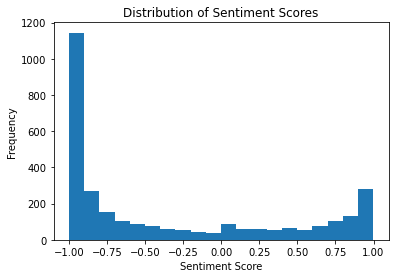

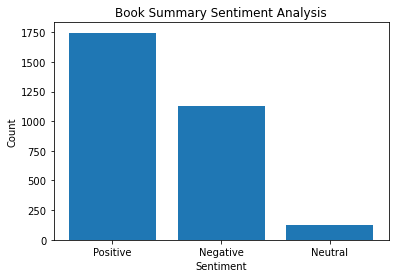

In [30]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
nltk.download('vader_lexicon')


# Define function to get sentiment score for each summary
def get_sentiment_score(text):
    sid = SentimentIntensityAnalyzer()
    score = sid.polarity_scores(text)
    return score['compound']

# Apply the function to get the sentiment score for each summary
data['sentiment_score'] = data['summary'].apply(lambda x: get_sentiment_score(x))

# Display first 10 rows with their sentiment score
print(data[['summary', 'sentiment_score']].head(10))

# Plot a bar chart of the sentiment scores
plt.hist(data['sentiment_score'], bins=20)
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Scores')
plt.show()

def get_sentiment(summary):
    blob = TextBlob(summary)
    sentiment = blob.sentiment.polarity
    if sentiment > 0:
        return 'Positive'
    elif sentiment < 0:
        return 'Negative'
    else:
        return 'Neutral'
data['sentiment'] = data['summary'].apply(get_sentiment)

# Plot the sentiment distribution
sentiment_counts = data['sentiment'].value_counts()
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Book Summary Sentiment Analysis')
plt.show()